# KUIS 2 Pembelajaran Mesin

## Tentang dataset

Pada sebuah lembaga kemanusiaan berbasis teknologi informasi, dibentuk beberapa tim kemanusiaan yang bertugas untuk terjun ke masyarakat memberikan bantuan dalam bentuk aplikasi komputer atau layanan pelatihan IT.  Kegiatn tersebut dilaksanakan setiap tahun dengan ketentuan anggota organisasi tersebut dapat bergabung ke beberapa tim sebagai ketua atau anggota. Terdapat pula anggota yang sudah tidak aktif di organisasi tersebut (terhapus di database mereka —> label N/A).  Organisasi tersebut juga melakukan rekrutmen volunteer, namun tidak semua tim menggunakan bantuan volunteer. Hasil kegiatan dari setiap tim dapat diwujudkan ke dalam sebuah pengakuan hak cipta atau publikasi karya ilmiah atau publikasi berita di media massa.

## Ketentuan
1. Pengerjaan secara individu alias setiap mahasiswa!
2. Terdapat data dengan nilai #N/A, pertimbangkan cara terbaik untuk mengatasi nilai tersebut.
3. Tidak boleh ada duplikasi pekerjaan antar mahasiswa
4. Berikan penjelasan untuk setiap tahapan. Jangan hanya kode!

## Soal
1. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (10 poin)
2. Tentukan data validasi! (10 poin)
3. Tentukan secara tepat kolom yang menjadi "label" (20 poin)
4. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)
5. Lakukan tunning hyperparameter berdasarkan hasil klasifikasi pada nomor 3 menggunakan metode Grid Search dan Random Search! Simpulkan parameter apa yang paling baik digunakan berdasarkan metode klasifikasi yang dipilih, dan berapa akurasinya. (40 poin)

Load Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('dataset_quiz.xlsx')
0
df.head(100)

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.0,9303.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.0,9007.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
82,8601.0,8903.0,8703.0,NaN,NaN,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.0,6204.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


Cek Informasi Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_ketua            82 non-null     float64
 1   id_anggota1         80 non-null     float64
 2   id_anggota2         81 non-null     float64
 3   id_anggota3         82 non-null     float64
 4   id_anggota4         72 non-null     float64
 5   id_anggota5         1 non-null      float64
 6   keterlibatan_vltr   85 non-null     object 
 7   jml_vltr_terlibat   85 non-null     int64  
 8   tahun               85 non-null     int64  
 9   skema               85 non-null     object 
 10  luaran_hki          85 non-null     object 
 11  jenis_luaran_hki    85 non-null     object 
 12  potensi_hki         85 non-null     object 
 13  luaran_lain         85 non-null     object 
 14  jenis_luaran_lain   85 non-null     object 
 15  status_luaran_lain  85 non-null     object 
dtypes: float64

In [3]:
#menghapus kolom id_anggota5, karena sebagian besar nilainya null
df = df.drop(['id_anggota5'], axis=1)

In [4]:
feature_columns = ['id_ketua', 'id_anggota1', 'id_anggota2', 'id_anggota3', 'id_anggota4']

In [5]:
# Impute nilai NaN dengan mean
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=np.nan, strategy="mean", copy=False)

df[feature_columns] = fill_values.fit_transform(df[feature_columns])
df

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.00000,7801.000000,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.00000,9202.000000,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.00000,9003.000000,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.00000,8903.000000,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.00000,8402.000000,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.00000,9303.000000,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.00000,9007.000000,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
82,8601.0,8903.0,8703.0,8419.04878,8572.388889,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.00000,6204.000000,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [6]:
#Label Encoder kolom yang bertipe data object

from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()

df['keterlibatan_vltr'] = labelencoder.fit_transform(df['keterlibatan_vltr'])
df['skema'] = labelencoder.fit_transform(df['skema'])
df['luaran_hki'] = labelencoder.fit_transform(df['luaran_hki'])
df['jenis_luaran_hki'] = labelencoder.fit_transform(df['jenis_luaran_hki'])
df['potensi_hki'] = labelencoder.fit_transform(df['potensi_hki'])
df['luaran_lain'] = labelencoder.fit_transform(df['luaran_lain'])
df['jenis_luaran_lain'] = labelencoder.fit_transform(df['jenis_luaran_lain'])
df['status_luaran_lain'] = labelencoder.fit_transform(df['status_luaran_lain'])
    
display(df)

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.00000,7801.000000,0,0,2019,1,1,1,2,0,3,1
1,7214.0,7109.0,8402.0,7903.00000,9202.000000,0,0,2019,1,1,1,2,0,3,1
2,5911.0,8201.0,8701.0,9101.00000,9003.000000,0,0,2019,1,1,1,2,0,3,1
3,8402.0,7702.0,8602.0,8903.00000,8903.000000,0,0,2019,1,1,1,2,0,3,1
4,8201.0,8305.0,5911.0,5903.00000,8402.000000,0,0,2019,1,1,1,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.00000,9303.000000,1,3,2022,1,1,1,2,0,3,1
81,6211.0,8901.0,9003.0,9303.00000,9007.000000,1,3,2022,1,1,1,2,0,3,1
82,8601.0,8903.0,8703.0,8419.04878,8572.388889,1,3,2022,1,1,1,2,0,3,1
83,8703.0,8601.0,9202.0,9102.00000,6204.000000,1,3,2022,1,1,1,2,0,3,1


Membulatkan value kolom-kolom

In [7]:
df['id_anggota3'] = df['id_anggota3'].round(0)
df['id_anggota4'] = df['id_anggota4'].round(0)
df

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0,0,2019,1,1,1,2,0,3,1
1,7214.0,7109.0,8402.0,7903.0,9202.0,0,0,2019,1,1,1,2,0,3,1
2,5911.0,8201.0,8701.0,9101.0,9003.0,0,0,2019,1,1,1,2,0,3,1
3,8402.0,7702.0,8602.0,8903.0,8903.0,0,0,2019,1,1,1,2,0,3,1
4,8201.0,8305.0,5911.0,5903.0,8402.0,0,0,2019,1,1,1,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.0,9303.0,1,3,2022,1,1,1,2,0,3,1
81,6211.0,8901.0,9003.0,9303.0,9007.0,1,3,2022,1,1,1,2,0,3,1
82,8601.0,8903.0,8703.0,8419.0,8572.0,1,3,2022,1,1,1,2,0,3,1
83,8703.0,8601.0,9202.0,9102.0,6204.0,1,3,2022,1,1,1,2,0,3,1


In [8]:
# Cek kolom null
df.isnull().sum()

id_ketua              0
id_anggota1           0
id_anggota2           0
id_anggota3           0
id_anggota4           0
keterlibatan_vltr     0
jml_vltr_terlibat     0
tahun                 0
skema                 0
luaran_hki            0
jenis_luaran_hki      0
potensi_hki           0
luaran_lain           0
jenis_luaran_lain     0
status_luaran_lain    0
dtype: int64

Peninjauan Korelasi Antar Fitur

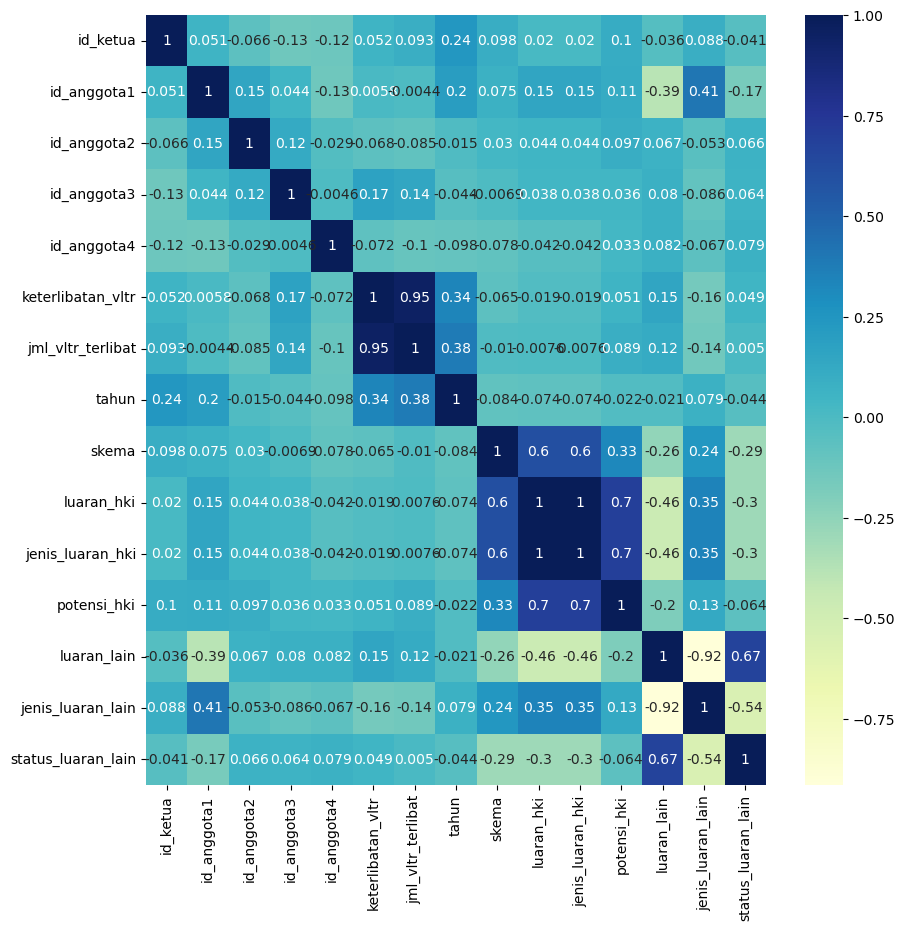

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [10]:
#Melihat korelasi antar kolom yang lebih dari 0,5
df.corr()[df.corr() > 0.5]

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
id_ketua,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_anggota1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_anggota2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_anggota3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_anggota4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keterlibatan_vltr,NaN,NaN,NaN,NaN,NaN,1.000000,0.952839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jml_vltr_terlibat,NaN,NaN,NaN,NaN,NaN,0.952839,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tahun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skema,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.604367,0.604367,NaN,NaN,NaN,NaN
luaran_hki,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.604367,1.000000,1.000000,0.700443,NaN,NaN,NaN


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
A = df[['id_ketua', 'id_anggota1', 'id_anggota2', 'id_anggota3', 'id_anggota4','keterlibatan_vltr','jml_vltr_terlibat','tahun','skema','luaran_hki','jenis_luaran_hki','potensi_hki','luaran_lain','jenis_luaran_lain','status_luaran_lain']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = A.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(A.values, i)
                          for i in range(len(A.columns))]
  
print(vif_data)

               feature         VIF
0             id_ketua  100.022690
1          id_anggota1   68.622885
2          id_anggota2   37.657394
3          id_anggota3   67.364252
4          id_anggota4   73.782126
5    keterlibatan_vltr   24.130349
6    jml_vltr_terlibat   23.966467
7                tahun  400.380748
8                skema   32.799025
9           luaran_hki         inf
10    jenis_luaran_hki         inf
11         potensi_hki   46.798619
12         luaran_lain   14.126431
13   jenis_luaran_lain   60.388425
14  status_luaran_lain   19.355597


G:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dapat disimpulkan label dari dataframe dataset_quiz adalah kolom luaran_lain, karena memiliki korelasi yang kuat antara luaran_lain dengan jenis_luaran_lain serta nilai VIF nya rendah

Splitting Data

In [12]:
#membuang kolom keterlibatan_vltr, karena korelasinya tinggi dan kolom luaran_lain sebagai label
x = df.drop(['keterlibatan_vltr','luaran_lain'], axis=1) 
y = df['luaran_lain'] #label

# Standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

Split Data Training dan Data Testing

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Split Data Training dan Data Evaluasi

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Implementasi DecisionTree dengan GridSearchCV

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# inisiasi model
dt = DecisionTreeClassifier()

params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(range(5,11))
}

grid = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=10, n_jobs=-1)

grid = grid.fit(x_val, y_val)

best_accuracy = grid.best_score_

best_parameters = grid.best_params_

print('Akurasi Terbaik   : {:.2f} %'.format(best_accuracy*100))
print('Parameter Terbaik :', best_parameters)

G:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Akurasi Terbaik   : 95.00 %
Parameter Terbaik : {'criterion': 'gini', 'max_depth': 6}


G:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "G:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "G:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "G:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
G:\anaconda3\lib\site-

Implementasi SVC dengan Randomized Serach

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

svm = SVC()

params = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [1, 5, 10, 50, 100],
    'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
}

random = RandomizedSearchCV(svm, param_distributions=params, n_jobs=-1, verbose = 2, error_score='raise')

random.fit(x_val, y_val)

best_accuracy = random.best_score_

best_parameters = random.best_params_

print('Akurasi Terbaik   : {:.2f} %'.format(best_accuracy*100))
print('Parameter Terbaik :', best_parameters)

G:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Akurasi Terbaik   : 86.67 %
Parameter Terbaik : {'kernel': 'linear', 'degree': 7, 'C': 5}


Dengan menerapkan GridSearchCV pada Decision Tree dan RandomizedSearchCV pada SVC, diperoleh nilai akurasi terbaik 95.00% dan parameter terbaik {'criterion': 'gini', 'max_depth': 5} yang menggunakan model Decision Tree